In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM,Dropout,Dense
from keras.models import Sequential

In [ ]:
data = pd.read_csv("RNN Dataset.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-02-28,21.261333,21.333332,20.720667,21.325333,21.325333,157810500
1,2019-03-01,20.462667,20.475332,19.459999,19.652666,19.652666,343671000
2,2019-03-04,19.874666,19.933332,18.851999,19.024000,19.024000,256452000
3,2019-03-05,18.799999,18.933332,18.006666,18.436001,18.436001,281470500
4,2019-03-06,18.431999,18.767332,18.292667,18.416000,18.416000,155032500
...,...,...,...,...,...,...,...
1254,2024-02-22,194.000000,198.320007,191.360001,197.410004,197.410004,92739500
1255,2024-02-23,195.309998,197.570007,191.500000,191.970001,191.970001,78841900
1256,2024-02-26,192.289993,201.779999,192.000000,199.399994,199.399994,111747100
1257,2024-02-27,204.039993,205.600006,198.259995,199.729996,199.729996,108645400


In [ ]:
train = data.iloc[:800, 1:2].values
test = data.iloc[:800, 1:2].values

In [ ]:
mm_scale = MinMaxScaler(feature_range=(0, 1))
training_scaled = mm_scale.fit_transform(train)

print(training_scaled)

In [ ]:
# Data Structure with 60 time steps and 1 output
x_train = []
y_train = []
for i in range(60, 800):
  x_train.append(training_scaled[i-60:i, 0])
  y_train.append(training_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
# Model Architecture
model = Sequential()

# Building Model
model.add(LSTM(units=50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))

In [ ]:
# Compiing The Model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fitting Values to Model
model.fit(x_train, y_train, epochs= 50, batch_size=32)

In [ ]:
# Preparing Test Data
train_data = data.iloc[:800, 1:2]
test_data = data.iloc[:800, 1:2]
total_data = pd.concat((train_data, test_data), axis=0)
inputs = total_data[len(total_data) - len(test_data) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = mm_scale.transform(inputs)

In [ ]:
x_test = []
for i in range(60, 519):
  x_test.append(inputs[i-60: i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Prediction
stock_price_predicted = model.predict(x_test)
stock_price_predicted = mm_scale.inverse_transform(stock_price_predicted)

15/15 [==============================] - 2s 30ms/step


In [ ]:
print(test_data)

           Open
0     21.261333
1     20.462667
2     19.874666
3     18.799999
4     18.431999
..          ...
795  326.323334
796  331.809998
797  299.526672
798  299.993347
799  300.750000

[800 rows x 1 columns]


ValueError: x and y must have same first dimension, but have shapes (459,) and (800, 1)

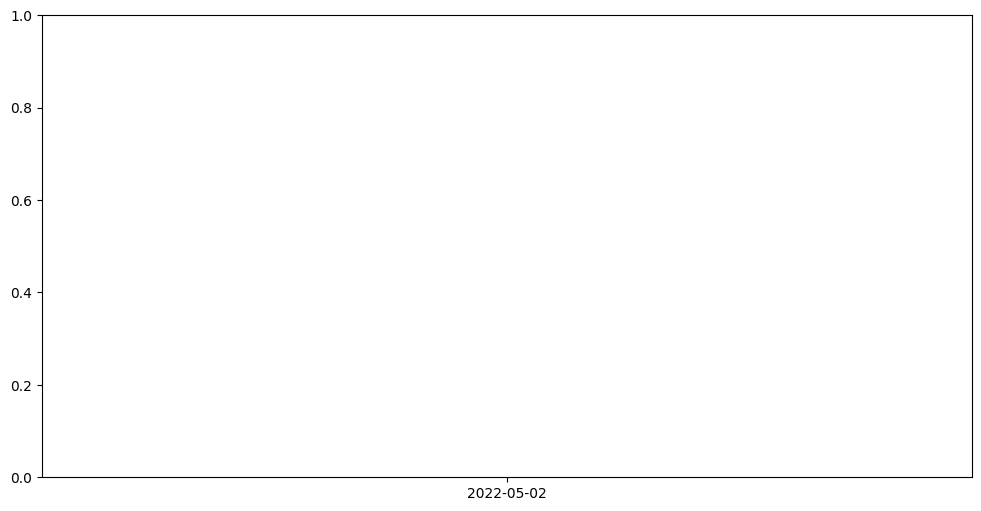

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data.loc[800:, 'Date'], test_data.values, color='red', label='Actual Price')
plt.plot(data.loc[800:, 'Date'], stock_price_predicted, color='blue', label='Predicted Price')
plt.xticks(np.arrange(0, 459, 50))
plt.title('TESLA Stock Price Prediction')
plt.xlable('Time')
plt.ylable('Stock Price')
plt.legend()
plt.show